In [14]:
from ipywidgets import interact
from ipywidgets import fixed
import matplotlib.pyplot as plt
import seaborn as sns
import calculate_return


def plot_sims(y, sim_type, random_seeds, BEGINNING_SAVINGS = 9041,
                   YEARLY_INFL_ADJUSTMENT = 0.0, PAY_TAXES = True, YEARS = 60, GAMMA = 2.5,
                   YEARLY_RF = 0.02, YEARLY_MR = 0.04, COST = 0.002, DEBT_PCT_OFFSET = 0.0,
                   SIGMA = 0.02837, MR = 0.076):
    
    ports = calculate_return.fetch_returns(sim_type, random_seeds, BEGINNING_SAVINGS,
                   YEARLY_INFL_ADJUSTMENT, PAY_TAXES, YEARS, GAMMA,
                   YEARLY_RF, YEARLY_MR, COST, DEBT_PCT_OFFSET,
                   SIGMA, MR)
    
    ports = ports.groupby(level=1).mean()
    ports['tv_u'] = ports['tv_u'] - ports['total_debt']
    fig, ax= plt.subplots(1, 1, figsize=(12,9))
    ax.plot(ports.loc[:,[*y]])
    ax.legend([*y])
    plt.show()

interactive_plot = interact(plot_sims, y=fixed(['tv_u', '100', '9050']), sim_type = ['garch', 't', 'norm', 'draw'],
                                                               random_seeds = fixed(range(500)), 
                           BEGINNING_SAVINGS = range(6000, 20000, 1000),
                   YEARLY_INFL_ADJUSTMENT = (0, 0.05, 0.01), PAY_TAXES = True, YEARS = (20, 50, 10), GAMMA = fixed(2.0),
                   YEARLY_RF = fixed(0.02), YEARLY_MR = (0.023, 0.063, 0.01), COST=(0, 0.01, 0.001),
                   DEBT_PCT_OFFSET = (0, 0.05, 0.01), SIGMA = fixed(0.02837), MR = fixed(0.076))
interactive_plot

interactive(children=(Dropdown(description='sim_type', options=('garch', 't', 'norm', 'draw'), value='garch'),…

<function __main__.plot_sims(y, sim_type, random_seeds, BEGINNING_SAVINGS=9041, YEARLY_INFL_ADJUSTMENT=0.0, PAY_TAXES=True, YEARS=60, GAMMA=2.5, YEARLY_RF=0.02, YEARLY_MR=0.04, COST=0.002, DEBT_PCT_OFFSET=0.0, SIGMA=0.02837, MR=0.076)>

In [15]:
def plot_dist(y, sim_type, random_seeds, BEGINNING_SAVINGS = 9041,
                   YEARLY_INFL_ADJUSTMENT = 0.0, PAY_TAXES = True, YEARS = 60, GAMMA = 2.5,
                   YEARLY_RF = 0.02, YEARLY_MR = 0.04, COST = 0.002,
                   SIGMA = 0.02837, MR = 0.076):
    
    ports = calculate_return.fetch_returns(sim_type, random_seeds, BEGINNING_SAVINGS,
                   YEARLY_INFL_ADJUSTMENT, PAY_TAXES, YEARS, GAMMA,
                   YEARLY_RF, YEARLY_MR, COST,
                   SIGMA, MR)
    
    data = ports.loc[[slice(None), YEARS*12], :].melt(value_vars=['tv_u', '100', '9050'], 
                       value_name='end_wealth', 
                       var_name = 'strategy')

    fig, ax = plt.subplots(figsize=(15, 10))
    sns.kdeplot(data = data, x='end_wealth', 
                hue='strategy',
                cumulative=True,
               linewidth = 3)
    plt.show()

interactive_plot = interact(plot_dist, y=fixed(['tv_u', '100', '9050']), sim_type = ['garch', 't', 'norm', 'draw'],
                                                               random_seeds = fixed(range(400)), 
                           BEGINNING_SAVINGS = range(6000, 20000, 1000),
                   YEARLY_INFL_ADJUSTMENT = (0, 0.05, 0.01), PAY_TAXES = True, YEARS = (20, 60, 10), GAMMA = (1, 2.5, 0.1),
                   YEARLY_RF = (0, 0.04, 0.005), YEARLY_MR = (0.03, 0.08, 0.005), COST=(0, 0.01, 0.001),
                   SIGMA = fixed(0.02837), MR = fixed(0.076))
interactive_plot

interactive(children=(Dropdown(description='sim_type', options=('garch', 't', 'norm', 'draw'), value='garch'),…

<function __main__.plot_dist(y, sim_type, random_seeds, BEGINNING_SAVINGS=9041, YEARLY_INFL_ADJUSTMENT=0.0, PAY_TAXES=True, YEARS=60, GAMMA=2.5, YEARLY_RF=0.02, YEARLY_MR=0.04, COST=0.002, SIGMA=0.02837, MR=0.076)>

In [15]:
 ports = calculate_return.fetch_returns('norm', range(10), BEGINNING_SAVINGS = 9041,
                   YEARLY_INFL_ADJUSTMENT = 0.0, PAY_TAXES = True, YEARS = 60, GAMMA = 2.5,
                   YEARLY_RF = 0.02, YEARLY_MR = 0.04, COST = 0.002,
                   SIGMA = 0.02837, MR = 0.076)

In [27]:
ports = calculate_return.fetch_returns('garch', range(5000), YEARLY_MR=0.023+0.02, DEBT_PCT_OFFSET=0.02)

pi_rf:   98.70%
pi_rm:   58.16%


/Users/nielseriksen/applied_finance/calculate_return.py:244: RuntimeWarning: invalid value encountered in double_scalars
  pp[i, pi_hat] = min(pp[i, pv_u] / ses_val, pp[i, pv_u] / pp[i, tv_u])
/Users/nielseriksen/applied_finance/calculate_return.py:260: RuntimeWarning: invalid value encountered in true_divide
  pp[:, g_hat] = pp[:, total_debt] / pp[:, equity]


/Users/nielseriksen/applied_finance/calculate_return.py:244: RuntimeWarning: invalid value encountered in double_scalars
  pp[i, pi_hat] = min(pp[i, pv_u] / ses_val, pp[i, pv_u] / pp[i, tv_u])
/Users/nielseriksen/applied_finance/calculate_return.py:260: RuntimeWarning: invalid value encountered in true_divide
  pp[:, g_hat] = pp[:, total_debt] / pp[:, equity]


In [28]:
check_wipeout = lambda x: 1 if (x['tv_u'] == 0 and x['savings'] == 0 and x['pi_hat'] == 0) else 0
ports['wipeout'] = ports.loc[(slice(None), 600), :].apply(check_wipeout, axis=1)
ports['wipeout'].fillna(method='bfill', inplace=True)

In [29]:
ports['dual_return'] = ports['dual_phase'].pct_change()
ports['single_return'] = ports['single_phase'].pct_change()
ports['100_return'] = ports['100'].pct_change()
ports['9050_return'] = ports['9050'].pct_change()

In [30]:
ports_no_wipeout = ports[ports['wipeout'] == 0]
cols = ['dual_return', 'single_return', '100_return', '9050_return']
sharpe_no_wipeout = (ports_no_wipeout.groupby('random_state', dropna=True).mean().loc[:, cols]/ports_no_wipeout.groupby('random_state', dropna=True).std().loc[:, cols]).melt()
sharpe = (ports.groupby('random_state', dropna=True).mean().loc[:, cols]/ports.groupby('random_state', dropna=True).std().loc[:, cols]).melt()

In [31]:
(ports.groupby('random_state', dropna=True).mean().loc[:, cols]/ports.groupby('random_state', dropna=True).std().loc[:, cols]).describe()

,dual_return,single_return,100_return,9050_return
count,4998.000000,5000.000000,4951.000000,5000.000000
mean,0.108555,0.107795,0.165212,0.171880
std,0.067508,0.067345,0.021479,0.015454
min,-0.091972,-0.093208,0.040812,0.058483
25%,0.054579,0.053068,0.154124,0.161690
50%,0.140792,0.142791,0.167221,0.172127
75%,0.160730,0.160115,0.178934,0.182066
max,0.211734,0.199225,0.230352,0.230539


<AxesSubplot:xlabel='value', ylabel='Density'>

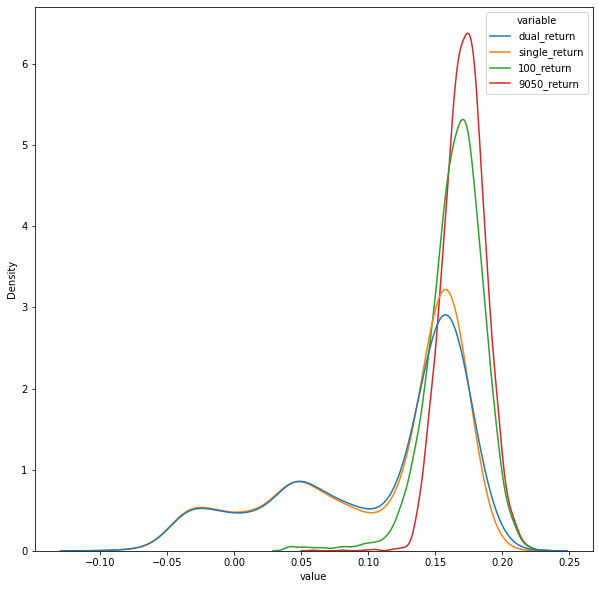

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.kdeplot(data = sharpe, x='value', hue='variable')

<AxesSubplot:xlabel='value', ylabel='Density'>

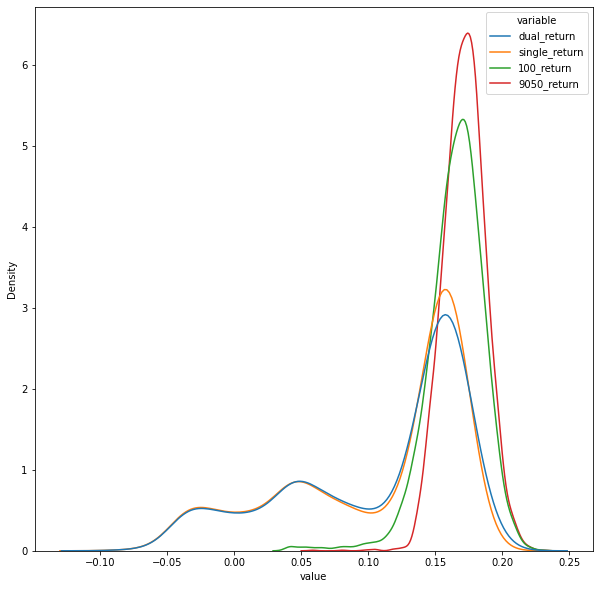

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.kdeplot(data = sharpe_no_wipeout, x='value', hue='variable')

In [34]:
(ports.groupby('random_state', dropna=True).mean().loc[:, cols]/ports.groupby('random_state', dropna=True).std().loc[:, cols]).describe()

,dual_return,single_return,100_return,9050_return
count,4998.000000,5000.000000,4951.000000,5000.000000
mean,0.108555,0.107795,0.165212,0.171880
std,0.067508,0.067345,0.021479,0.015454
min,-0.091972,-0.093208,0.040812,0.058483
25%,0.054579,0.053068,0.154124,0.161690
50%,0.140792,0.142791,0.167221,0.172127
75%,0.160730,0.160115,0.178934,0.182066
max,0.211734,0.199225,0.230352,0.230539


In [35]:
(ports_no_wipeout.groupby('random_state', dropna=True).mean().loc[:, cols]/ports_no_wipeout.groupby('random_state', dropna=True).std().loc[:, cols]).describe()

,dual_return,single_return,100_return,9050_return
count,4994.000000,4996.000000,4948.000000,4996.000000
mean,0.108592,0.107832,0.165229,0.171894
std,0.067511,0.067349,0.021474,0.015449
min,-0.091972,-0.093208,0.040812,0.058483
25%,0.054579,0.053068,0.154161,0.161710
50%,0.140854,0.142800,0.167230,0.172135
75%,0.160748,0.160117,0.178945,0.182071
max,0.211734,0.199225,0.230352,0.230539


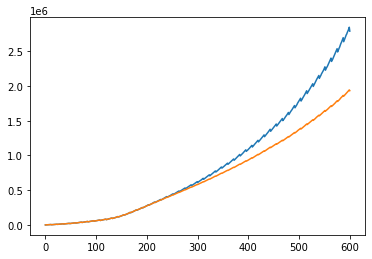

In [36]:
plt.plot(ports.groupby('period', dropna=True).mean().loc[:, ['dual_phase', 'single_phase']])

In [25]:
ports.loc[:, ['new_debt']].reset_index()

,random_state,period,new_debt
0,0,0.0,450.0
1,0,1.0,456.0
2,0,2.0,392.0
3,0,3.0,544.0
4,0,4.0,180.0
...,...,...,...
3004995,4999,596.0,0.0
3004996,4999,597.0,0.0
3004997,4999,598.0,0.0
3004998,4999,599.0,0.0


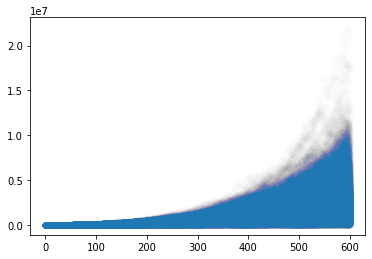

In [26]:
parameter = '100'
df = ports.loc[:, [parameter]].reset_index()
plt.scatter(x=df['period'], y=df[parameter], alpha=0.002)

In [138]:
ports.columns

Index(['savings', 'cash', 'new_equity', 'new_debt', 'total_debt', 'nip',
       'pv_p', 'interest', 'market_returns', 'pv_u', 'tv_u', 'equity', 'dst',
       'phase', 'pi_hat', 'g_hat', 'SU_debt', 'Nordnet_debt', 'dual_phase',
       'single_phase', '100', '9050', 'dual_return', 'single_return',
       '100_return', '9050_return', 'wipeout'],
      dtype='object')

### Illustrating temporal smoothing of market exposure

In [72]:
ports = calculate_return.fetch_returns('garch', range(10000), PAY_TAXES=False)

pi_rf:   98.70%
pi_rm:   93.41%


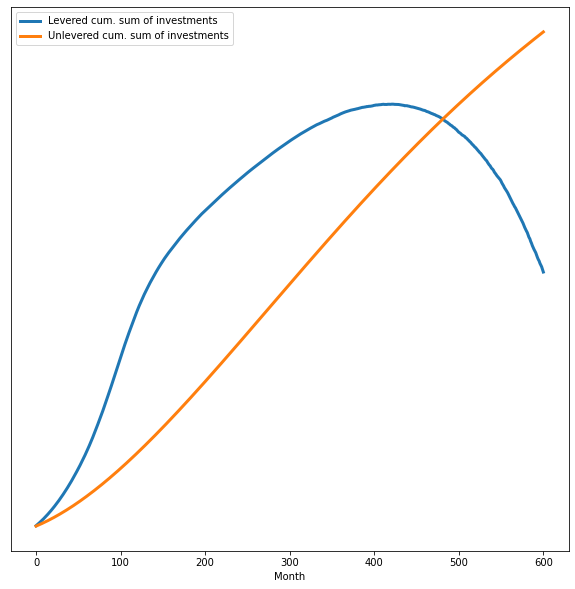

In [75]:
grouped = ports.groupby('period').mean()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(grouped['nip'].cumsum(), linewidth = 3)      # Levered investments
ax.plot(grouped['savings'].cumsum(), linewidth = 3)  # Normal investments without gearing
ax.get_yaxis().set_visible(False)
ax.set_xlabel('Month')
ax.legend(['Levered cum. sum of investments', 'Unlevered cum. sum of investments'])

### Delta version

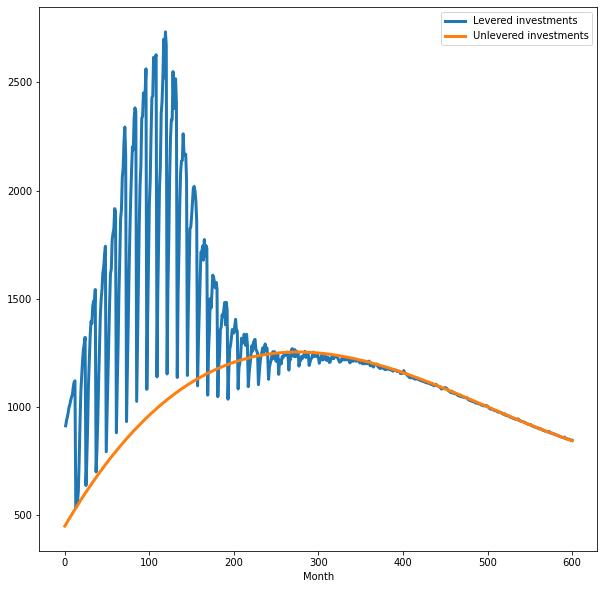

In [37]:
grouped = ports.groupby('period').mean()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(grouped['nip']+grouped['cash'].diff(), linewidth = 3)      # Levered investments
ax.plot(grouped['savings'], linewidth = 3)  # Normal investments without gearing
#ax.get_yaxis().set_visible(False)
ax.set_xlabel('Month')
ax.legend(['Levered investments', 'Unlevered investments'])